## **Import Data**

In [ ]:
# Mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mengupload file Bank Loan
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (1).csv


In [ ]:
# Membaca data Bank Loan
Bank_Loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [ ]:
# Melihat baris dan kolom pada data Bank Loan
Bank_Loan.shape

(5000, 14)

In [ ]:
# Melihat 5 data pertama Bank Loan
Bank_Loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Melihat 5 data terakhir Bank Loan
Bank_Loan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## **Exploratory Data Analysis**

### Removing Variable

In [ ]:
# Melihat variabel pada data Bank Loan
Bank_Loan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
# Drop variabel ID karena tidak relevan
Bank_Loan.drop("ID", axis=1, inplace=True)

In [ ]:
# Drop variabel ZIP Code karena tidak relevan
Bank_Loan.drop("ZIP Code", axis=1, inplace=True)

In [ ]:
# Melihat variabel yang baru pada data Bank Loan
Bank_Loan.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

### Mengoreksi Tipe Variabel

In [ ]:
# Melihat tipe data Bank Loan
Bank_Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [ ]:
# Merubah Tipe data Bank Loan yang belum sesuai
Bank_Loan['Education'] = Bank_Loan['Education'].astype('category')
Bank_Loan['Securities Account'] = Bank_Loan['Securities Account'].astype('category')
Bank_Loan['CD Account'] = Bank_Loan['CD Account'].astype('category')
Bank_Loan['Online'] = Bank_Loan['Online'].astype('category')
Bank_Loan['CreditCard'] = Bank_Loan['CreditCard'].astype('category')
Bank_Loan['Personal Loan'] = Bank_Loan['Personal Loan'].astype('category')
Bank_Loan.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

### Menghilangkan Data Duplikat

In [ ]:
# Mengecek apakah terdapat data yang duplikat
print(Bank_Loan.shape)
Bank_Loan.duplicated().sum()

(5000, 12)


13

In [ ]:
# Menghapus entri baris yang memiliki data duplikat 
Bank_Loan.drop_duplicates(inplace=True)
print(Bank_Loan.duplicated().sum()) # no more duplicates
print(Bank_Loan.shape) # re-check by printing data size

0
(4987, 12)


In [ ]:
# Melihat tipe data Bank Loan
Bank_Loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4987 non-null   int64   
 1   Experience          4987 non-null   int64   
 2   Income              4987 non-null   int64   
 3   Family              4987 non-null   int64   
 4   CCAvg               4987 non-null   float64 
 5   Education           4987 non-null   category
 6   Mortgage            4987 non-null   int64   
 7   Personal Loan       4987 non-null   category
 8   Securities Account  4987 non-null   category
 9   CD Account          4987 non-null   category
 10  Online              4987 non-null   category
 11  CreditCard          4987 non-null   category
dtypes: category(6), float64(1), int64(5)
memory usage: 302.5 KB


### Missing Value

In [ ]:
# Mengecek apakah terdapat data yang missing
Bank_Loan.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

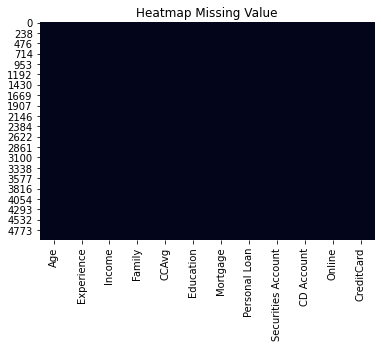

,persentase missing
Age,0.0
Experience,0.0
Income,0.0
Family,0.0
CCAvg,0.0
Education,0.0
Mortgage,0.0
Personal Loan,0.0
Securities Account,0.0
CD Account,0.0


In [ ]:
# Mengecek apakah terdapat data yang missing
sns.heatmap(Bank_Loan.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()
(Bank_Loan.isnull().sum()/len(Bank_Loan)).to_frame('persentase missing')

### Outlier

In [ ]:
# Menampilkan statistika deskriptif dari data Bank Loan
Bank_Loan.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage
count,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000
mean,45.347704,20.114498,73.824544,2.396631,1.940630,56.646080
std,11.460838,11.464902,46.062728,1.147510,1.748824,101.805341
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,101.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000


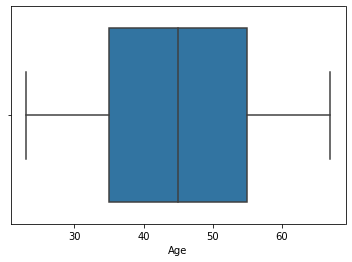

In [ ]:
# Mengecek outlier pada variabel Age
plt.figure()
sns.boxplot(x=Bank_Loan['Age'])
plt.show()

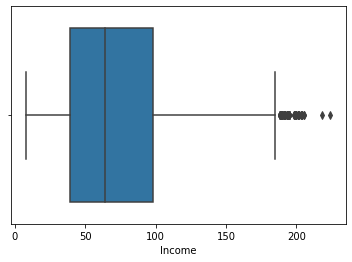

In [ ]:
# Mengecek outlier pada variabel Income
plt.figure()
sns.boxplot(x=Bank_Loan['Income'])
plt.show()

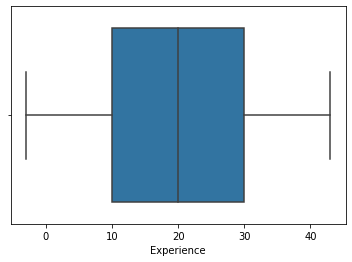

In [ ]:
# Mengecek outlier pada variabel Experience
plt.figure()
sns.boxplot(x=Bank_Loan['Experience'])
plt.show()

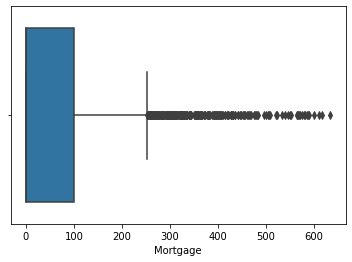

In [ ]:
# Mengecek outlier pada variabel Mortgage
plt.figure()
sns.boxplot(x=Bank_Loan['Mortgage'])
plt.show()

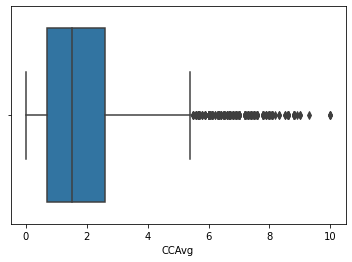

In [ ]:
# Mengecek outlier pada variabel CCAvg
plt.figure()
sns.boxplot(x=Bank_Loan['CCAvg'])
plt.show()

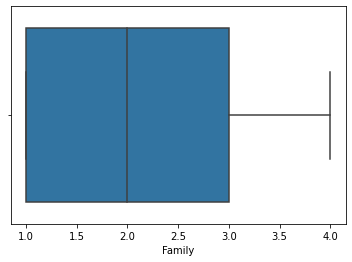

In [ ]:
# Mengecek outlier pada variabel Family
plt.figure()
sns.boxplot(x=Bank_Loan['Family'])
plt.show()

In [ ]:
# Tipe data Bank Loan dan Menyimpan data
Bank_Loan.info()
Bank_Loan.to_csv("Bank_EDA.csv",encoding='utf8')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4987 non-null   int64   
 1   Experience          4987 non-null   int64   
 2   Income              4987 non-null   int64   
 3   Family              4987 non-null   int64   
 4   CCAvg               4987 non-null   float64 
 5   Education           4987 non-null   category
 6   Mortgage            4987 non-null   int64   
 7   Personal Loan       4987 non-null   category
 8   Securities Account  4987 non-null   category
 9   CD Account          4987 non-null   category
 10  Online              4987 non-null   category
 11  CreditCard          4987 non-null   category
dtypes: category(6), float64(1), int64(5)
memory usage: 302.5 KB


## **Visualisasi Data**

### Visualisasi Variabel Numerik

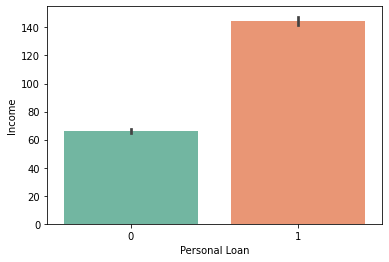

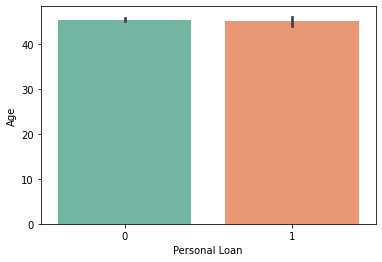

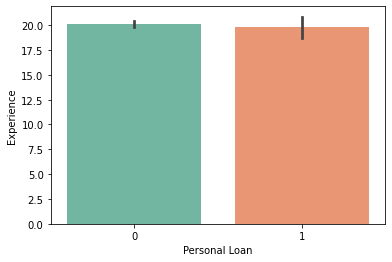

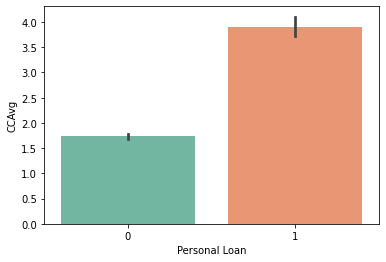

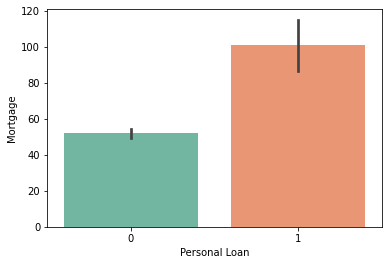

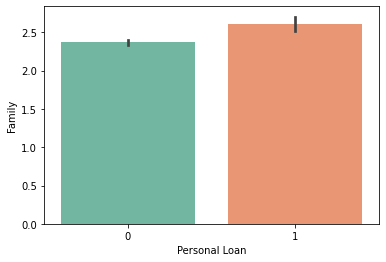

In [ ]:
# Melihat hubungan dari setiap variabel numerik dengan Personal Loan
sns.barplot(x = "Personal Loan", y = "Income", data = Bank_Loan, palette= "Set2")
plt.show()
sns.barplot(x = "Personal Loan", y = "Age", data = Bank_Loan, palette= "Set2")
plt.show()
sns.barplot(x = "Personal Loan", y = "Experience", data = Bank_Loan, palette= "Set2")
plt.show()
sns.barplot(x = "Personal Loan", y = "CCAvg", data = Bank_Loan, palette= "Set2")
plt.show()
sns.barplot(x = "Personal Loan", y = "Mortgage", data = Bank_Loan, palette= "Set2")
plt.show()
sns.barplot(x = "Personal Loan", y = "Family", data = Bank_Loan, palette= "Set2")
plt.show()

### Merubah variabel Age

In [ ]:
# Proporsi  variabel "Age"
Bank_Loan["Age"].value_counts()

35    151
43    149
52    145
54    143
58    143
50    137
30    136
41    136
56    135
34    134
39    132
57    132
59    132
51    129
45    127
46    127
60    126
42    126
55    125
40    124
31    124
62    123
61    122
29    121
44    120
32    120
33    120
48    118
49    115
38    114
47    113
53    111
63    108
36    106
37    106
28    102
27     91
65     80
64     78
26     78
25     53
24     28
66     23
23     12
67     12
Name: Age, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


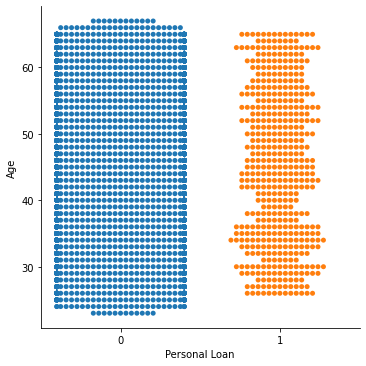

In [ ]:
# Melihat hubungan variabel Age dengan Personal Loan
p = sns.catplot(x="Personal Loan", y="Age", kind="swarm", data=Bank_Loan)

In [ ]:
 # Mendefinisikan data baru
 Bank_Loan1 = Bank_Loan.copy()

In [ ]:
# Merubah Age menjadi 2 kategori
bins = [23,55,67] #23-55 #56-67
kategori = ['Dewasa','Tua']
Bank_Loan1['Age_binned'] = pd.cut(Bank_Loan1['Age'], bins=bins, labels=kategori)

In [ ]:
# Melihat proporsi variabel Age yang kategorik
Bank_Loan1["Age_binned"].value_counts()

Dewasa    3761
Tua       1214
Name: Age_binned, dtype: int64

In [ ]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

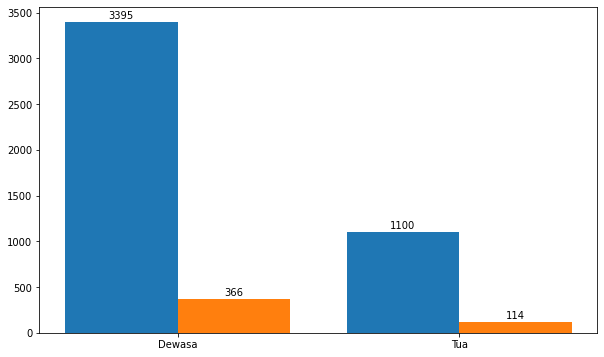

In [ ]:
# Melihat hubungan variabel Age dengan Personal Loan
counts = Bank_Loan1.groupby(["Age_binned", "Personal Loan"]).size().unstack()
plt.figure(figsize=(10,6))
groupedbarplot(counts)
plt.show()

In [ ]:
# Melihat hubungan variabel Age dengan Personal Loan
Bank_Loan1.groupby(["Age_binned", "Personal Loan"]).size().unstack()

Personal Loan,0,1
Age_binned,,
Dewasa,3395,366
Tua,1100,114


###Visualisasi Variabel Kategorik




In [ ]:
# Melihat proporsi variabel Education
print(Bank_Loan["Education"].value_counts())
# Melihat proporsi variabel Securities Account
print(Bank_Loan["Securities Account"].value_counts())
# Melihat proporsi variabel CD Account
print(Bank_Loan["CD Account"].value_counts())
# Melihat proporsi variabel Online
print(Bank_Loan["Online"].value_counts())
# Melihat proporsi variabel Credit Card
print(Bank_Loan["CreditCard"].value_counts())

1    2095
3    1493
2    1399
Name: Education, dtype: int64
0    4465
1     522
Name: Securities Account, dtype: int64
0    4685
1     302
Name: CD Account, dtype: int64
1    2973
0    2014
Name: Online, dtype: int64
0    3518
1    1469
Name: CreditCard, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


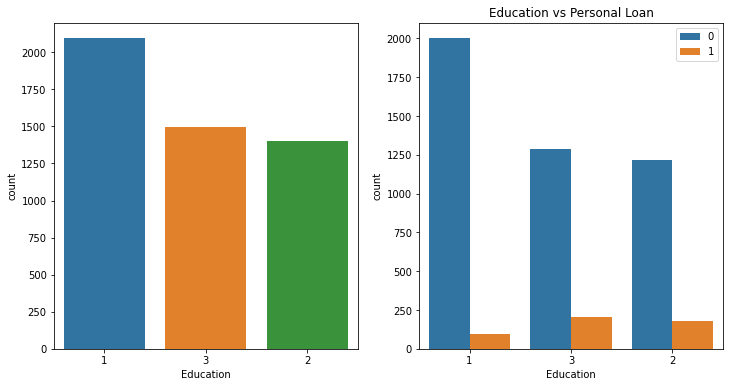

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


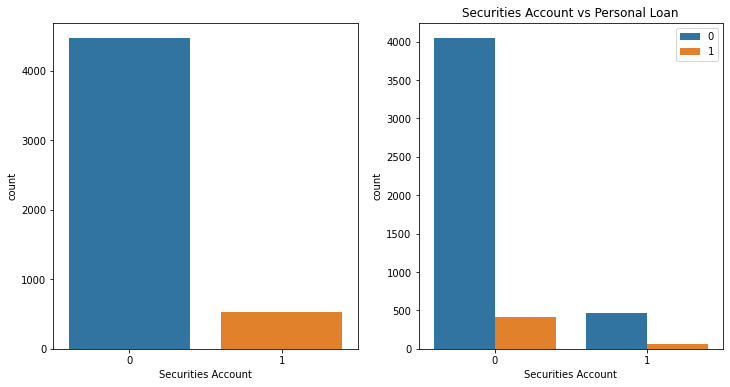

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


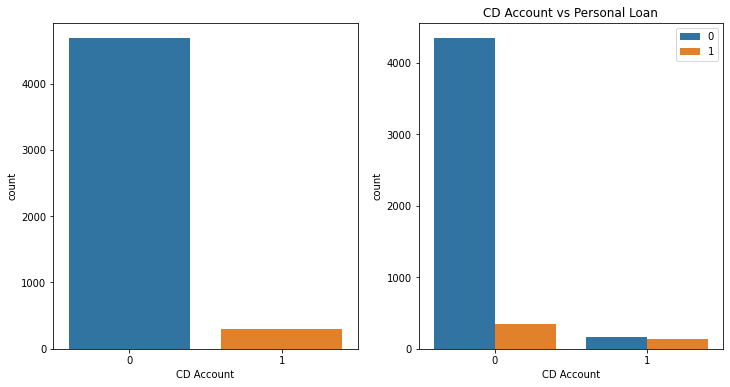

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


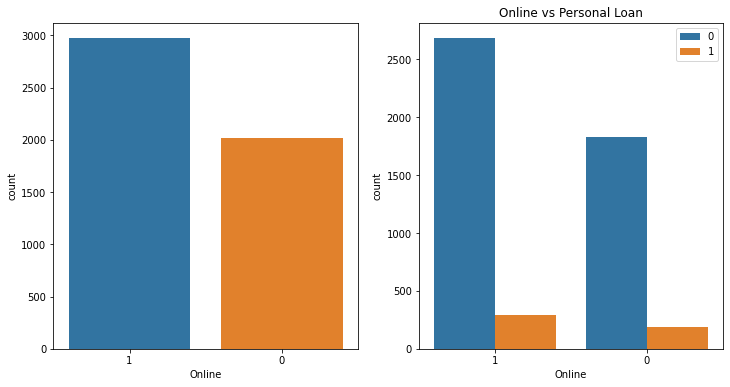

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


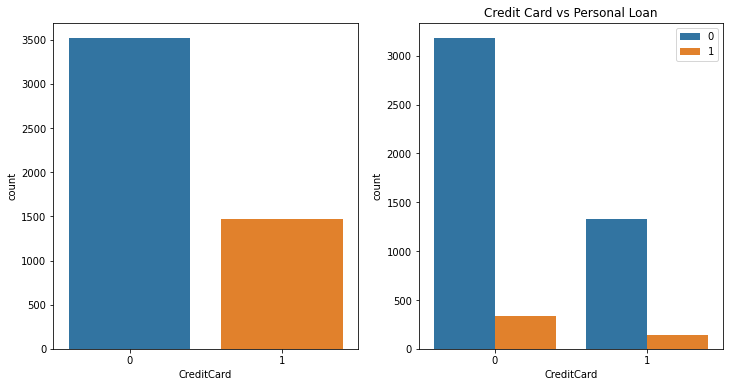

In [ ]:
# Melihat hubungan variabel Education dengan Personal Loan
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(Bank_Loan['Education'],hue=Bank_Loan['Personal Loan'],ax=axes[1],order = Bank_Loan["Education"].value_counts().index)
plt.legend()
ax.set_title('Education vs Personal Loan')
ax = sns.countplot(Bank_Loan['Education'],ax=axes[0],order = Bank_Loan["Education"].value_counts().index)
plt.legend()
plt.show()

# Melihat hubungan variabel Securities Account dengan Personal Loan
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(Bank_Loan['Securities Account'],hue=Bank_Loan['Personal Loan'],ax=axes[1],order = Bank_Loan["Securities Account"].value_counts().index)
plt.legend()
ax.set_title('Securities Account vs Personal Loan')
ax = sns.countplot(Bank_Loan['Securities Account'],ax=axes[0],order = Bank_Loan["Securities Account"].value_counts().index)
plt.legend()
plt.show()

# Melihat hubungan variabel CD Account dengan Personal Loan
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(Bank_Loan['CD Account'],hue=Bank_Loan['Personal Loan'],ax=axes[1],order = Bank_Loan["CD Account"].value_counts().index)
plt.legend()
ax.set_title('CD Account vs Personal Loan')
ax = sns.countplot(Bank_Loan['CD Account'],ax=axes[0],order = Bank_Loan["CD Account"].value_counts().index)
plt.legend()
plt.show()

# Melihat hubungan variabel Online dengan Personal Loan
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(Bank_Loan['Online'],hue=Bank_Loan['Personal Loan'],ax=axes[1],order = Bank_Loan["Online"].value_counts().index)
plt.legend()
ax.set_title('Online vs Personal Loan')
ax = sns.countplot(Bank_Loan['Online'],ax=axes[0],order = Bank_Loan["Online"].value_counts().index)
plt.legend()
plt.show()

# Melihat hubungan variabel Credit Card dengan Personal Loan
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(Bank_Loan['CreditCard'],hue=Bank_Loan['Personal Loan'],ax=axes[1],order = Bank_Loan["CreditCard"].value_counts().index)
plt.legend()
ax.set_title('Credit Card vs Personal Loan')
ax = sns.countplot(Bank_Loan['CreditCard'],ax=axes[0],order = Bank_Loan["CreditCard"].value_counts().index)
plt.legend()
plt.show()

In [ ]:
# Melihat hubungan variabel Education dengan Personal Loan
print(Bank_Loan.groupby(["Education", "Personal Loan"]).size().unstack())
# Melihat hubungan variabel Securities Account dengan Personal Loan
print(Bank_Loan.groupby(["Securities Account", "Personal Loan"]).size().unstack())
# Melihat hubungan variabel CD Account dengan Personal Loan
print(Bank_Loan.groupby(["CD Account", "Personal Loan"]).size().unstack())
# Melihat hubungan variabel Online dengan Personal Loan
print(Bank_Loan.groupby(["Online", "Personal Loan"]).size().unstack())
# Melihat hubungan variabel Credit Card dengan Personal Loan
print(Bank_Loan.groupby(["Online", "Personal Loan"]).size().unstack())

Personal Loan     0    1
Education               
1              2002   93
2              1217  182
3              1288  205
Personal Loan          0    1
Securities Account           
0                   4045  420
1                    462   60
Personal Loan     0    1
CD Account              
0              4345  340
1               162  140
Personal Loan     0    1
Online                  
0              1825  189
1              2682  291
Personal Loan     0    1
Online                  
0              1825  189
1              2682  291


### Visualisasi variabel Income dan CCAvg dengan Personal Loan



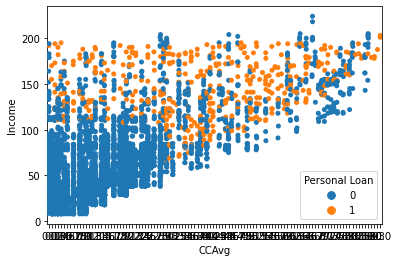

In [ ]:
# Melihat hubungan variabel Income dan CCAvg dengan Personal Loan
p = sns.stripplot(x="CCAvg",  y="Income", hue="Personal Loan", data=Bank_Loan)

###Visualisasi variabel Mortgage dan Income dengan Personal Loan

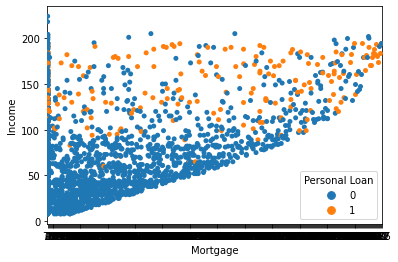

In [ ]:
# Melihat visualisasi variabel Mortgage dan Income dengan Personal Loan
p = sns.stripplot(x="Mortgage",  y="Income", hue="Personal Loan", data=Bank_Loan)

###Visualisasi variabel Family dan Income dengan Personal Loan

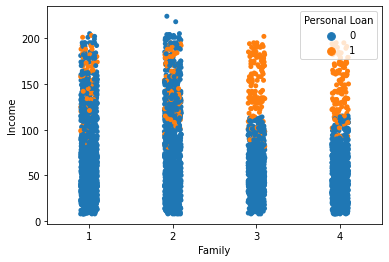

In [ ]:
# Melihat visualisasi variabel Family dan Income dengan Personal Loan
p = sns.stripplot(x="Family",  y="Income", hue="Personal Loan", data=Bank_Loan)

###Visualisasi variabel Experience dan Income dengan Personal Loan

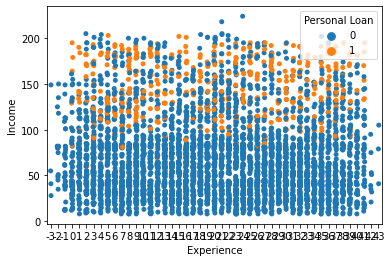

In [ ]:
# Melihat visualisasi variabel Experience dan Income dengan Personal Loan
p = sns.stripplot(x="Experience",  y="Income", hue="Personal Loan", data=Bank_Loan)

### Visualisasi variabel Mortgage dan CCAvg dengan Personal Loan

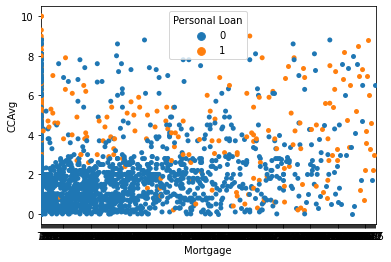

In [ ]:
# Melihat visualisasi variabel Mortgage dan CCAvg dengan Personal Loan
p = sns.stripplot(x="Mortgage",  y="CCAvg", hue="Personal Loan", data=Bank_Loan)

###Visualisasi variabel Family dan CCAvg dengan Personal Loan

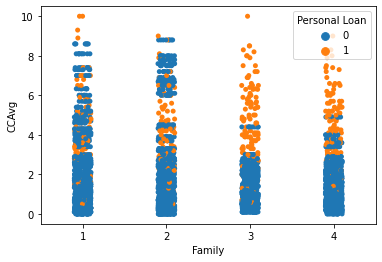

In [ ]:
# Melihat visualisasi variabel Family dan CCAvg dengan Personal Loan
p = sns.stripplot(x="Family",  y="CCAvg", hue="Personal Loan", data=Bank_Loan)

### Visualisasi variabel Family dan Mortgage dengan Personal Loan

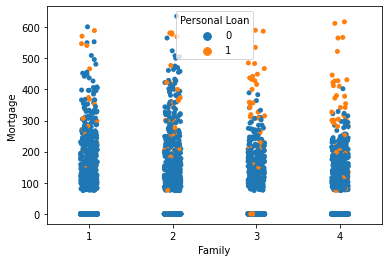

In [ ]:
# Melihat visualisasi variabel Family dan Mortgage dengan Personal Loan
p = sns.stripplot(x="Family",  y="Mortgage", hue="Personal Loan", data=Bank_Loan)

### Visualisasi variabel Age dan Experience dengan Personal Loan


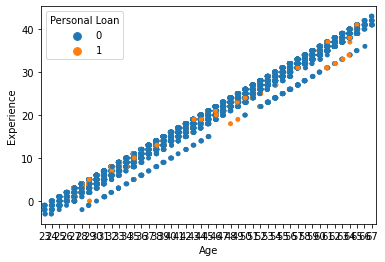

In [ ]:
# Melihat visualisasi variabel Age dan Experience dengan Personal Loan
p = sns.stripplot(x="Age",  y="Experience", hue="Personal Loan", data=Bank_Loan)

###Visualisasi variabel Education dan Income dengan Personal Loan

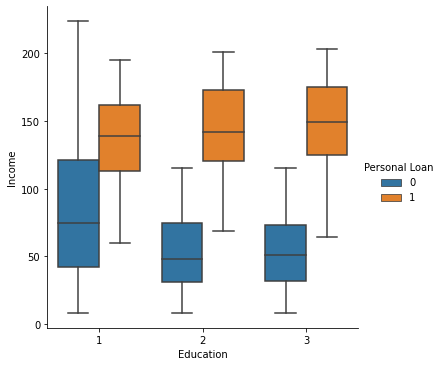

In [ ]:
sns.catplot(x='Education', y = 'Income', data = Bank_Loan,kind= 'box',hue='Personal Loan')

###Visualisasi variabel Education dan Mortgage dengan Personal Loan

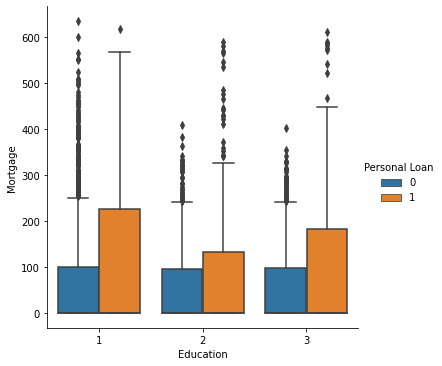

In [ ]:
sns.catplot(x='Education',y='Mortgage',data=Bank_Loan,hue='Personal Loan',kind='box')

###Korelasi

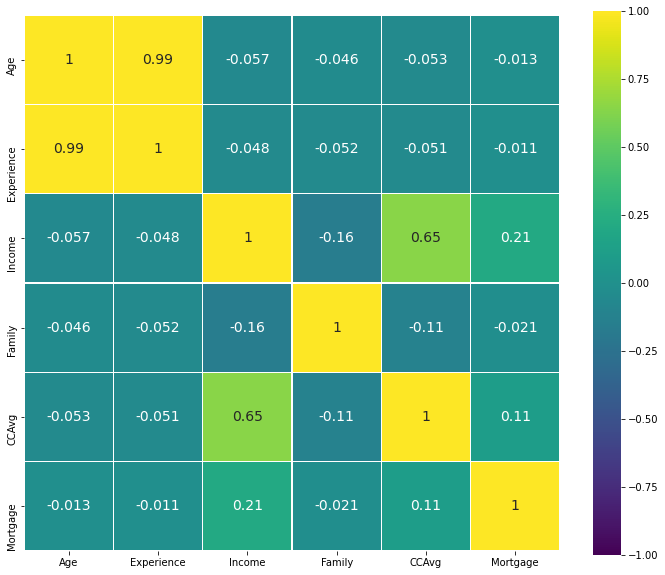

In [ ]:
# Melihat korelasi antar variabel dengan heatmap
korelasi = Bank_Loan.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(data=korelasi, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 14}, square=True);

##**Klasifikasi**

In [ ]:
# Mengimport library yang dibutuhkan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
import time
import warnings; warnings.simplefilter('ignore')

In [ ]:
# Mendefenisikan variabel target
x = Bank_Loan.drop(columns=['Personal Loan'])
y = Bank_Loan['Personal Loan']

In [ ]:
# Melihat proporsi variabel target
y.value_counts()

0    4507
1     480
Name: Personal Loan, dtype: int64

In [ ]:
# Membagi data menjadi data train dan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

###Logistic Regression

In [ ]:
# Melakukan klasifikasi dengan metode Logistic Regression
LR = LogisticRegression()
# Menghitung akurasi dengan 10 cross validation
Akurasi_LR = cross_val_score(LR, x_train, y_train, cv=10, scoring='accuracy') # perhatikan sekarang kita menggunakan seluruh data
print(Akurasi_LR)
# Menghitung presisi dengan 10 cross validation
Precision_LR = cross_val_score(LR, x_train, y_train, cv=10, scoring='precision')
print(Precision_LR)

[0.93483709 0.94736842 0.94987469 0.93233083 0.95739348 0.95739348
 0.93734336 0.93483709 0.95989975 0.93718593]
[0.75       0.84       0.8        0.66666667 0.92       0.88888889
 0.79166667 0.68571429 0.92592593 0.74074074]


In [ ]:
# Menghitung running time
mulai = time.time()
waktu = time.time() - mulai

In [ ]:
# Rata-rata dari akurasi dan presisi dari 10 cross validasi
print("Accuracy Logreg: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (Akurasi_LR.mean(), Akurasi_LR.std() * 2, waktu))
print("Precision Logreg: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (Precision_LR.mean(), Precision_LR.std() * 2, waktu))

Accuracy Logreg: 0.94 (+/- 0.02), Waktu = 0.000 detik
Precision Logreg: 0.80 (+/- 0.18), Waktu = 0.000 detik


###K Nearest Neighbor

In [ ]:
# Memanggil knn untuk klasifikasi
knn = KNeighborsClassifier()

In [ ]:
# Melakukan klasifikasi dengan cross validasi pada metode knn
CV = 10
metric = 'accuracy'
params = {}
params['kneighborsclassifier__n_neighbors'] = [1, 3, 5, 10, 15, 20, 25, 30]
params['kneighborsclassifier__weights'] = ('distance', 'uniform')

pipe = make_pipeline(KNeighborsClassifier())
optKnn = GridSearchCV(pipe, params, cv=CV, scoring=metric, verbose=1, n_jobs=-2) # , pre_dispatch='2*n_jobs', pre_dispatch min 2* n_jobs
optKnn.fit(x_train, y_train)
print(optKnn.best_score_)
print(optKnn.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


0.9150155539602775
{'kneighborsclassifier__n_neighbors': 25, 'kneighborsclassifier__weights': 'distance'}


[Parallel(n_jobs=-2)]: Done 160 out of 160 | elapsed:    4.5s finished


In [ ]:
# Menghitung running time
mulai1 = time.time()
waktu1 = time.time() - mulai1

In [ ]:
# Menghitung akurasi dengan 10 cross validation
knn_1 = KNeighborsClassifier(n_neighbors=25, weights='distance')
Akurasi_knn = cross_val_score(knn_1, x_train, y_train, cv=10, scoring='accuracy')
print(Akurasi_knn)
# Menghitung precision dengan 10 cross validation
Precision_knn = cross_val_score(knn_1, x_train, y_train, cv=10, scoring='precision')
print(Precision_knn)

[0.92230576 0.91478697 0.90726817 0.9197995  0.92230576 0.91729323
 0.90977444 0.90977444 0.91478697 0.9120603 ]
[0.76923077 0.66666667 0.53846154 0.65       0.66666667 0.69230769
 0.61538462 0.61538462 0.77777778 0.58823529]


In [ ]:
# Rata-rata dari Akuarsi dan Precision dari 10 cross validation
print("Accuracy knn: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (Akurasi_knn.mean(), Akurasi_knn.std() * 2, waktu1))
print("Precision knn: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (Precision_knn.mean(), Precision_knn.std() * 2, waktu1))

Accuracy knn: 0.92 (+/- 0.01), Waktu = 0.000 detik
Precision knn: 0.66 (+/- 0.14), Waktu = 0.000 detik


###Random Forest

In [ ]:
# Melakukan klasifikasi dengan metode Random Forest
# Menghitung akurasi dengan 10 cross validation
rf = RandomForestClassifier()
Akurasi_rf = cross_val_score(rf, x_train, y_train, cv=10, scoring='accuracy')
print(Akurasi_rf)
# Menghitung precision dengan 10 cross validation
Precision_rf = cross_val_score(rf, x_train, y_train, cv=10, scoring='precision')
print(Precision_rf)

[0.98746867 0.98746867 0.97744361 0.98746867 0.98997494 0.9924812
 0.97493734 0.9924812  0.98746867 0.98241206]
[0.94594595 0.97058824 0.96875    1.         0.97222222 1.
 0.94117647 1.         0.94736842 1.        ]


In [ ]:
# Menghitung running time\
mulai2 = time.time()
waktu2 = time.time() - mulai2

In [ ]:
# Rata-rata dari Akuarsi dan Precision dari 10 cross validation
print("Accuracy Random Forest: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (Akurasi_rf.mean(), Akurasi_rf.std() * 2, waktu2))
print("Precision Random Forest: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (Precision_rf.mean(), Precision_rf.std() * 2, waktu2))

Accuracy Random Forest: 0.99 (+/- 0.01), Waktu = 0.000 detik
Precision Random Forest: 0.97 (+/- 0.05), Waktu = 0.000 detik


Feature ranking:
1. feature 2 (0.335420)
2. feature 5 (0.197697)
3. feature 4 (0.168138)
4. feature 3 (0.105342)
5. feature 8 (0.053632)
6. feature 1 (0.042159)
7. feature 0 (0.040072)
8. feature 6 (0.035976)
9. feature 10 (0.008905)
10. feature 9 (0.008140)
11. feature 7 (0.004518)


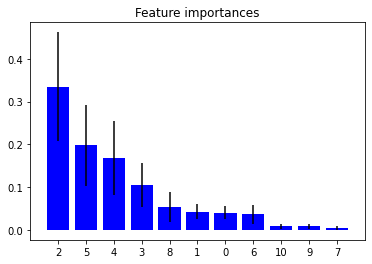

In [ ]:
# Feature/Varible importance
rf.fit(x_train, y_train)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Hasil plot dari Feature Importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_test.shape[1]), importances[indices],color="b", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()